<a href="https://colab.research.google.com/github/eliasalemann/UNI/blob/main/EX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO**:

Agrupar 100 recetas de reposteria en 2 o mas grupos con caracteristicas similares (clusteres). Se utilizara la libreria 'Pycaret'


**RESULTADOS:**
1.   El modelo actual permite identificar el tipo de panaderia con una precision del 100, basado en una muestra de 80 observaciones de entrenamiento y 20 muestras de prueba
2.   Los ingredientes mas importantes para identificar las panaderias de tipo 1 son la harina (menores cantidades, mayor probabilidad), azucar y huevos (mayores cantidades, mayor probabilidad) 

A. Lectura de datos

In [13]:
#Instalando Pycaret
#!pip install pycaret

#Importando Pandas
import pandas as pd
 
#Web link
link = "https://raw.githubusercontent.com/eliasalemann/UNI/main/data/pastry2.csv"
 
#Leyendo archivo csv
df = pd.read_csv(link)

B. Analisis exploratorio




1.   La base de datos contiene 100 recetas de distintos tipos de reposteria
2.   Los rangos de las variables parecen correctos, excepto la variable 'Salt' que tiene varianza 0, esta variable se borrara eventualmente.



In [2]:
#Rango de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Flour,100.0,44.30,6.982663,33.0,38.00,42.5,50.00,59.0
Milk,100.0,18.51,6.780088,0.0,13.75,17.0,24.00,37.0
Sugar,100.0,17.72,7.488820,0.0,12.00,19.0,23.00,36.0
Butter,100.0,11.43,5.152728,1.0,8.00,10.0,15.25,27.0
Egg,100.0,6.90,3.157483,0.0,5.00,6.0,9.00,16.0
Baking Powder,100.0,1.34,0.699495,0.0,1.00,1.0,2.00,3.0
Vanilla,100.0,0.56,0.537860,0.0,0.00,1.0,1.00,2.0
Salt,100.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0




3.   No hay valores nulos, ni duplicados y el tipo de datos es aceptable (todas las variables son numericas)




In [3]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Flour          100 non-null    int64
 1   Milk           100 non-null    int64
 2   Sugar          100 non-null    int64
 3   Butter         100 non-null    int64
 4   Egg            100 non-null    int64
 5   Baking Powder  100 non-null    int64
 6   Vanilla        100 non-null    int64
 7   Salt           100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [4]:
#Valores nulos
df.isnull().sum()

Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [5]:
#Valores duplicados
df.duplicated().sum()

0

C. Modelado de datos


In [16]:
#Importando la libreria de clasificacion
from pycaret.clustering import *

#Definicion del modelo
set_up = setup(df,
      ignore_features = ['Salt','Vanilla','Baking Powder'],  #Se elimina por la falta de varianza o por ser categorica 
      numeric_features = ['Flour',  'Milk', 'Sugar',    'Butter',   'Egg'],  #Se modelara como una variable continua
      categorical_features = [],
      normalize = True,
      silent = True)

#Utilizando K-means con 2 clusters
KM = create_model('kmeans', num_clusters= 2)

#Agregando clusteres a los datos
df1 = assign_model(KM)

#Convirtiendo Cluster de texto a numerica
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Cluster'] = label_encoder.fit_transform(df1['Cluster'])
 
df1.head()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4033,88.9517,0.9926,0,0,0


,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Cluster
0,34,17,20,20,5,2,1,0,1
1,53,24,11,9,5,2,0,0,0
2,39,17,24,19,7,2,0,0,1
3,42,18,25,9,5,1,0,0,1
4,34,20,20,20,11,0,1,0,1


D. Resultados


Hay 50 observacioes (50%) en cada cluster

In [19]:
#Distribucion de los tipos de panaderia
df1.groupby('Cluster').count()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Cluster,,,,,,,,
0,50,50,50,50,50,50,50,50
1,50,50,50,50,50,50,50,50


2.  Basado en el analis numerico y grafico de correlaciones:

*   Las reposterias en el Cluster # 1 contienen mayores cantidades de azucar (Sugar), 
'Mantequilla' (Butter) y Huevos (Egg) que el tipo 0 (correlaciones varian de moderadas a muy altas)
*   Las reposterias en el Cluster # 1 contienen menores cantidades de harina (Flour) y leche (Milk) que el tipo 0 (correlaciones varian de moderadas a muy altas)




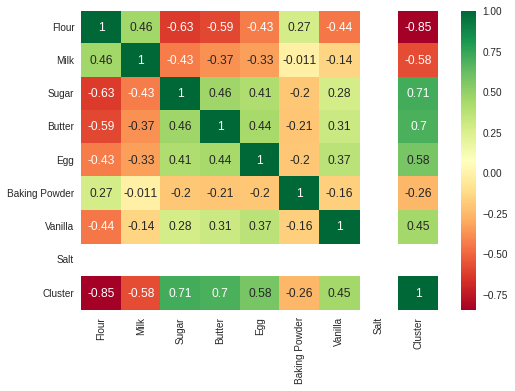

In [22]:
##Analisis correlacional numerico
import seaborn as sb
sb.heatmap(df1.corr(), annot=df1.corr(), cmap = 'RdYlGn')

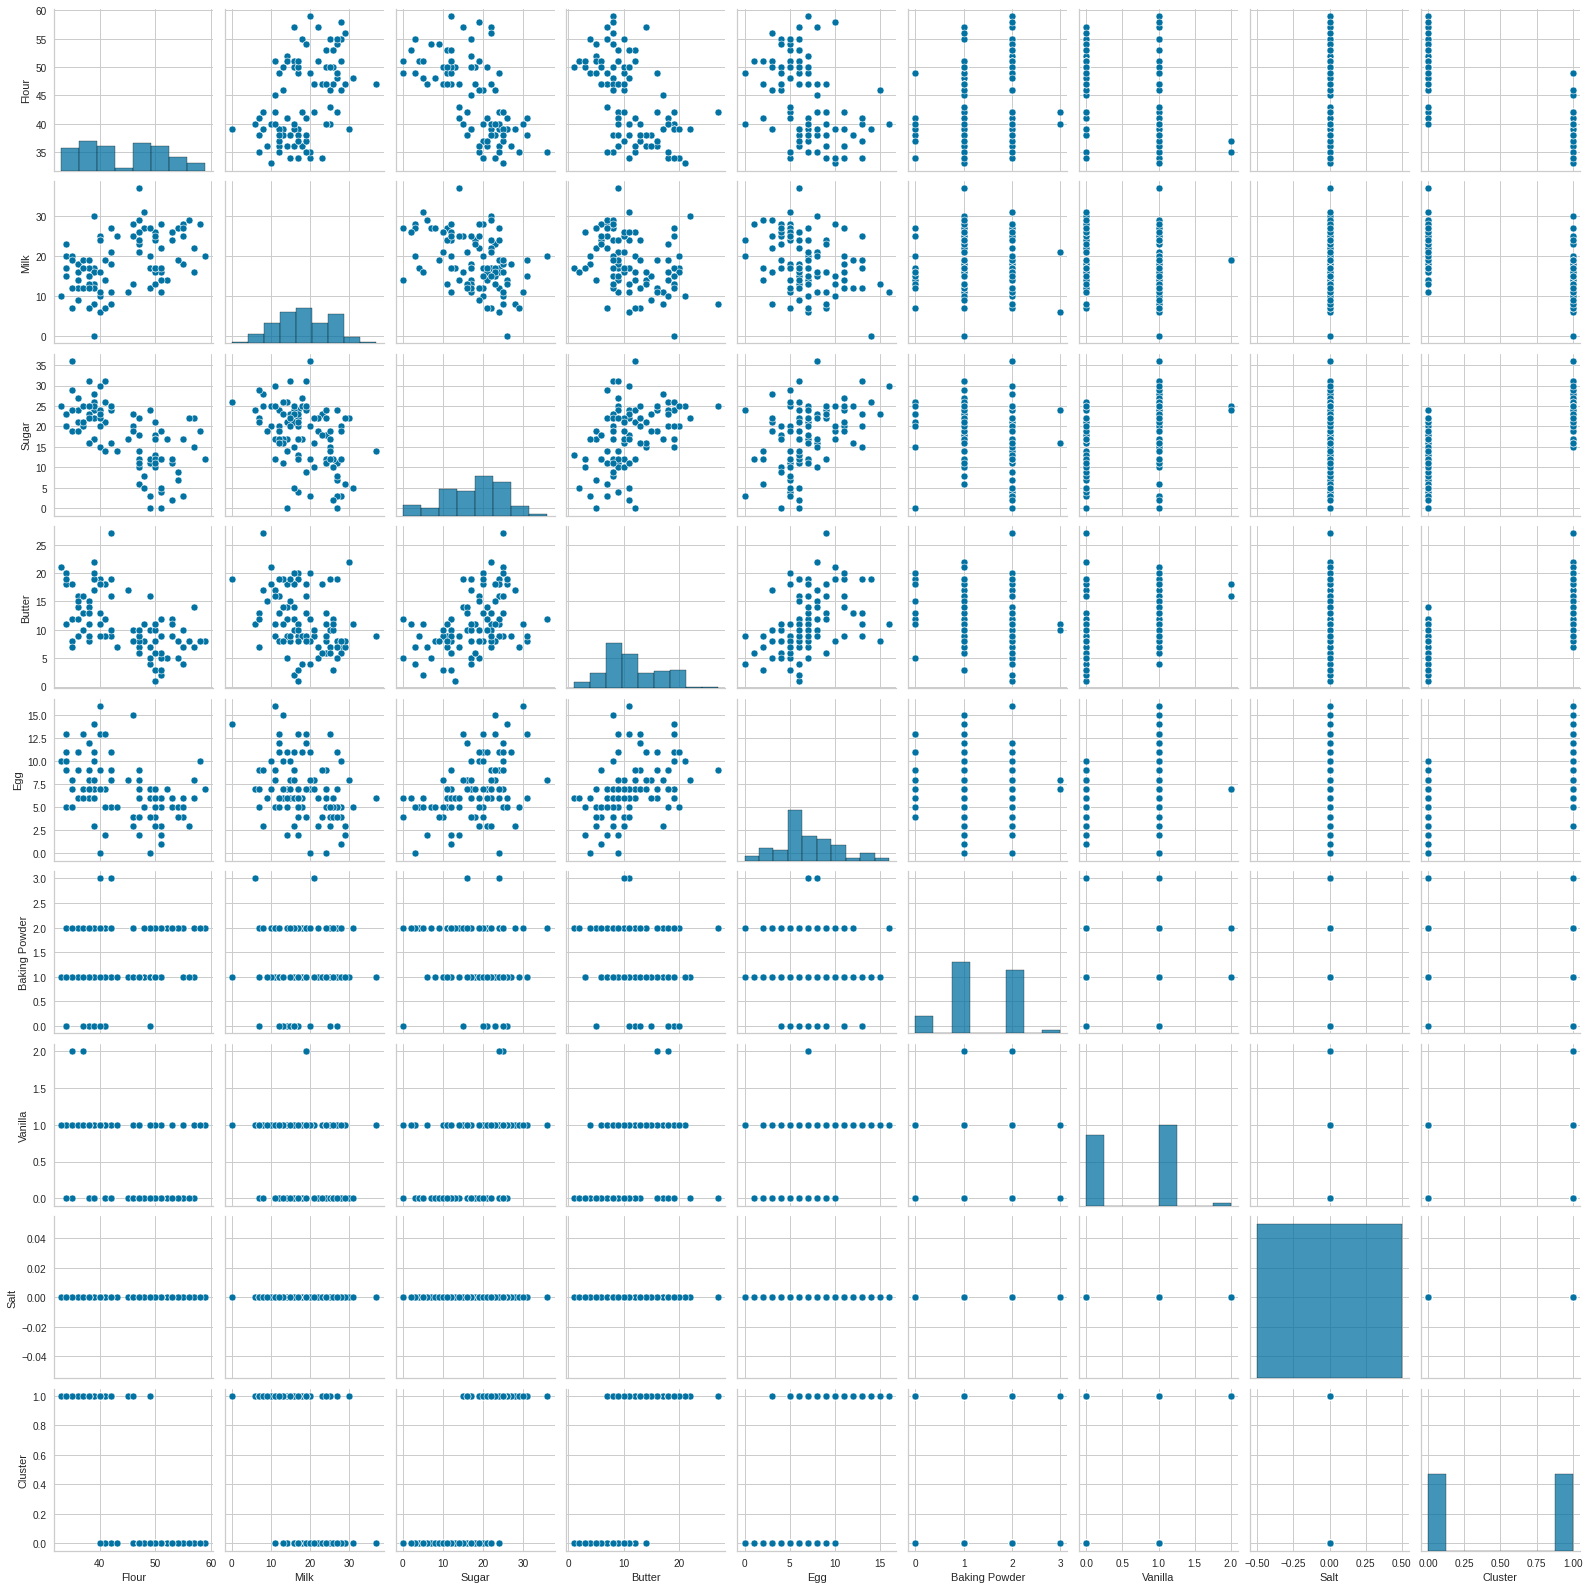

In [23]:
#Analisis correlacional grafico
sb.pairplot(df1)